In [2]:
import pickle
import os

FOLDER = os.getcwd() + "/1_pt_blurry"

with open(FOLDER+'/ori.pkl', 'rb') as file:   
    ori = pickle.load(file)
with open(FOLDER+'/mask.pkl', 'rb') as file:   
    mask = pickle.load(file)
with open(FOLDER+'/out.pkl', 'rb') as file:   
    out = pickle.load(file)
with open(FOLDER+'/psf.pkl', 'rb') as file:   
    original_psf = pickle.load(file)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import numpy as np
from SyMBac.PSF import PSF_generator
from utils import *

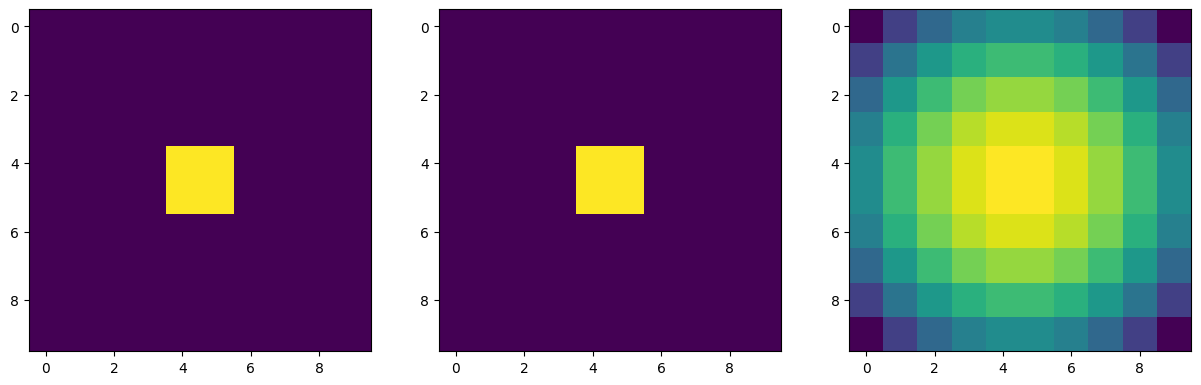

In [4]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(ori)
axarr[1].imshow(mask)
axarr[2].imshow(out)
plt.show()

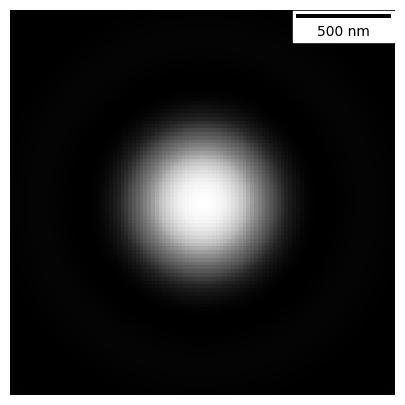

[[0.00414948 0.00415171 0.00409537 ... 0.00409537 0.00415171 0.00414948]
 [0.00415171 0.00409358 0.00397612 ... 0.00397612 0.00409358 0.00415171]
 [0.00409537 0.00397612 0.00379854 ... 0.00379854 0.00397612 0.00409537]
 ...
 [0.00409537 0.00397612 0.00379854 ... 0.00379854 0.00397612 0.00409537]
 [0.00415171 0.00409358 0.00397612 ... 0.00397612 0.00409358 0.00415171]
 [0.00414948 0.00415171 0.00409537 ... 0.00409537 0.00415171 0.00414948]]


/home/boomalope/symbac/symbac/lib/python3.8/site-packages/SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


In [5]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.0, 
    n = 1.4, 
    resize_amount = 1, 
    pix_mic_conv = 0.02, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)
print(psf)

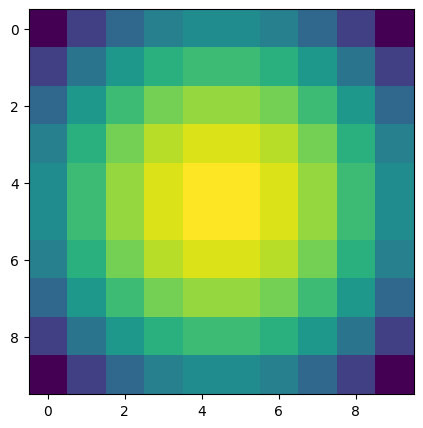

[[3.44824733 3.55061417 3.6290343  3.68210969 3.70888841 3.70888841
  3.68210969 3.6290343  3.55061417 3.44824733]
 [3.55061417 3.65549193 3.73582889 3.79019842 3.81762911 3.81762911
  3.79019842 3.73582889 3.65549193 3.55061417]
 [3.6290343  3.73582889 3.81762912 3.87298651 3.90091488 3.90091488
  3.87298651 3.81762912 3.73582889 3.6290343 ]
 [3.68210969 3.79019842 3.87298651 3.92901082 3.95727517 3.95727517
  3.92901082 3.87298651 3.79019842 3.68210969]
 [3.70888841 3.81762911 3.90091488 3.95727517 3.98570878 3.98570878
  3.95727517 3.90091488 3.81762911 3.70888841]
 [3.70888841 3.81762911 3.90091488 3.95727517 3.98570878 3.98570878
  3.95727517 3.90091488 3.81762911 3.70888841]
 [3.68210969 3.79019842 3.87298651 3.92901082 3.95727517 3.95727517
  3.92901082 3.87298651 3.79019842 3.68210969]
 [3.6290343  3.73582889 3.81762912 3.87298651 3.90091488 3.90091488
  3.87298651 3.81762912 3.73582889 3.6290343 ]
 [3.55061417 3.65549193 3.73582889 3.79019842 3.81762911 3.81762911
  3.79019842

In [6]:
def convolve(original, psf):
    output = np.zeros(original.shape)
    for i in range(len(original)):
        for j in range(len(original[0])):
            for k in range(len(output)):
                for l in range(len(output[0])):
                    output[k][l] += original[i][j] * GetPSFMatrix([i,j],[k,l],psf)
    return output

output = convolve(ori,psf)
plt.imshow(output)
plt.show()
print(output)